In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Batsman_Data.csv")   # reading all the rows and columns
#Since a player did not bat in a particular match I'm using df.replace()

df=df.replace("DNB",-1)
df=df.replace("TDNB",-1)
df=df.replace("-",0)
#TO replace v India and so on to India 


a2=list(set(df['Opposition']))
a3= ["India","Australia","England","Bangladesh","West Indies","Afghanistan","Pakistan","South Africa","New Zealand","Sri Lanka"]
a4=[]
for i in a2:
    a4.append(i[2:])
a5=list(set(a4)-set(a3))

a6=[]
for j in a5:
    a6.append("v "+j)




for i in range(0,len(a6),1):
        
        df=df.replace(a6[i],np.nan)
    
df=df.dropna()

for i in df:
    df.loc[df['Opposition']=='v India', 'Opposition']='India'
    df.loc[df['Opposition']=='v Australia','Opposition']='Australia'
    df.loc[df['Opposition']=='v Sri Lanka','Opposition']='Sri Lanka'
    df.loc[df['Opposition']=='v New Zealand','Opposition']='New Zealand'
    df.loc[df['Opposition']=='v South Africa','Opposition']='South Africa'
    df.loc[df['Opposition']=='v Afghanistan','Opposition']='Afghanistan'
    df.loc[df['Opposition']=='v Pakistan','Opposition']='Pakistan'
    df.loc[df['Opposition']=='v West Indies','Opposition']='West Indies'
    df.loc[df['Opposition']=='v England','Opposition']='England'
    df.loc[df['Opposition']=='v Bangladesh','Opposition']='Bangladesh'


df=df.drop(['Player_ID','Match_ID','Start Date'],axis=1)
df=df.drop(df.columns[0],axis=1)

df

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Batsman
0,16,16,28,57.14,0,0,Sri Lanka,Melbourne,Aaron Finch
1,4,4,15,26.66,0,0,Sri Lanka,Adelaide,Aaron Finch
2,10,10,6,166.66,1,0,West Indies,Perth,Aaron Finch
3,11,11,22,50,2,0,West Indies,Perth,Aaron Finch
4,38,38,41,92.68,5,0,West Indies,Canberra,Aaron Finch
...,...,...,...,...,...,...,...,...,...
11144,-1,0,0,0,0,0,New Zealand,Mount Maunganui,Yuzvendra Chahal
11145,-1,0,0,0,0,0,New Zealand,Mount Maunganui,Yuzvendra Chahal
11146,18*,18,37,48.64,3,0,New Zealand,Hamilton,Yuzvendra Chahal
11147,0*,0,1,0,0,0,New Zealand,Wellington,Yuzvendra Chahal


In [5]:
p1=list(set(df['Runs']))
for i in range(0,len(p1),1):
    df=df.replace(p1[i],int(p1[i]))
p2=list(set(df['Batsman']))


g=df.groupby(['Batsman','Opposition'])
g1=[]
g2=[]
for i,j in g:
    g1.append(list(i))
    g2.append(str(j.Runs.mean()))



In [6]:
df1=pd.read_csv("Bowler_data.csv")
   #dropping first column 
#Replacing average to 0 when the bowler doesn't take any wickets in that match
df1=df1.replace("-",0)


        
a2=list(set(df1['Opposition']))
a3= ["India","Australia","England","Bangladesh","West Indies","Afghanistan","Pakistan","South Africa","New Zealand","Sri Lanka"]
a4=[]
for i in a2:
    a4.append(i[2:])
a5=list(set(a4)-set(a3))
a6=[]
for j in a5:
    a6.append("v "+j)




for i in range(0,len(a6),1):
        
        df1=df1.replace(a6[i],np.nan)
    
df1=df1.dropna()
#df1=df1.drop(df.columns[0],axis=1)
for i in df1:
    df1.loc[df1['Opposition']=='v India', 'Opposition']='India'
    df1.loc[df1['Opposition']=='v Australia','Opposition']='Australia'
    df1.loc[df1['Opposition']=='v Sri Lanka','Opposition']='Sri Lanka'
    df1.loc[df1['Opposition']=='v New Zealand','Opposition']='New Zealand'
    df1.loc[df1['Opposition']=='v South Africa','Opposition']='South Africa'
    df1.loc[df1['Opposition']=='v Afghanistan','Opposition']='Afghanistan'
    df1.loc[df1['Opposition']=='v Pakistan','Opposition']='Pakistan'
    df1.loc[df1['Opposition']=='v West Indies','Opposition']='West Indies'
    df1.loc[df1['Opposition']=='v England','Opposition']='England'
    df1.loc[df1['Opposition']=='v Bangladesh','Opposition']='Bangladesh'

df1=df1.drop(['Player_ID','Match_ID','Start Date','SR'],axis=1)
df1=df1.drop(df1.columns[0],axis=1)



In [7]:
df1

,Overs,Mdns,Runs,Wkts,Econ,Ave,Opposition,Ground,Bowler
0,0,0,0,0,0,0,Sri Lanka,Melbourne,Aaron Finch
1,0,0,0,0,0,0,Sri Lanka,Adelaide,Aaron Finch
2,0,0,0,0,0,0,West Indies,Perth,Aaron Finch
3,0,0,0,0,0,0,West Indies,Perth,Aaron Finch
4,0,0,0,0,0,0,West Indies,Canberra,Aaron Finch
...,...,...,...,...,...,...,...,...,...
11113,9.2,0,52,2,5.57,26,New Zealand,Mount Maunganui,Yuzvendra Chahal
11114,9,0,51,2,5.66,25.5,New Zealand,Mount Maunganui,Yuzvendra Chahal
11115,2.4,0,32,0,12,0,New Zealand,Hamilton,Yuzvendra Chahal
11116,10,0,41,3,4.1,13.66,New Zealand,Wellington,Yuzvendra Chahal


In [8]:
p1=list(set(df1['Wkts']))
for i in range(0,len(p1),1):
    df1=df1.replace(p1[i],int(p1[i]))
p2=list(set(df1['Bowler']))


g=df1.groupby(['Bowler','Opposition'])
a=[]
b=[]
for i,j in g:
    a.append(list(i))
    b.append(j.Wkts.mean())
f=[]
for i in a:
    f.append(i[0])

        

In [9]:
df2=pd.read_csv("Ground_Averages.csv")
df2=df2.drop(['Span','NR'],axis=1)

In [10]:
df2

,Ground,Mat,Won,Tied,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",4,4,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",4,4,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,15,15,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2,2,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,10,10,0,4863,157,5645,30.97,5.16
...,...,...,...,...,...,...,...,...,...
101,"Greenfield International Stadium, Thiruvananth...",1,1,0,209,11,280,19.00,4.47
102,Sylhet International Cricket Stadium - Bangladesh,1,1,0,400,11,531,36.36,4.51
103,"Rajiv Gandhi International Cricket Stadium, De...",5,4,0,1864,67,2524,27.82,4.43
104,"Wanderers Cricket Ground, Windhoek - Namibia",1,1,0,307,17,474,18.05,3.88


In [11]:
df3=pd.read_csv("ODI_Match_Totals.csv")


df3.head()

df3=df3.drop([df3.columns[0],df3.columns[9],df3.columns[10],df3.columns[12]],axis='columns')#remove columns

df3.head()

columns=list(df3)

for i in columns: #replace respective values by desired value
    df3.loc[df3['Result']=='won', 'Result']=1
    df3.loc[df3['Result']=='lost','Result']=0
    df3.loc[df3['Result']=='n/r','Result']=-1
    df3.loc[df3['Result']=='aban','Result']=-1
    df3.loc[df3['Result']=='tied','Result']=-1


df3=df3[~df3.Opposition.str.contains("v Ireland")] #remove rows with these countries
df3=df3[~df3.Opposition.str.contains("v U.S.A.")]
df3=df3[~df3.Opposition.str.contains("v U.A.E")]
df3=df3[~df3.Opposition.str.contains("v Netherlands")]
df3=df3[~df3.Opposition.str.contains("v Kenya")]
df3=df3[~df3.Opposition.str.contains("v Zimbabwe")]
df3=df3[~df3.Opposition.str.contains("v P.N.G")]
df3=df3[~df3.Opposition.str.contains("v Hong Kong")]

for i in columns:  #correct name 
    df3.loc[df3['Country']=='Newzealad', 'Country']='New Zealand'


for i in columns:  #removing 'v' 
    df3.loc[df3['Opposition']=='v Australia', 'Opposition']='Australia'
    df3.loc[df3['Opposition']=='v New Zealand', 'Opposition']='New Zealand'
    df3.loc[df3['Opposition']=='v England', 'Opposition']='England'
    df3.loc[df3['Opposition']=='v Sri Lanka', 'Opposition']='Sri Lanka'
    df3.loc[df3['Opposition']=='v South Africa', 'Opposition']='South Africa'
    df3.loc[df3['Opposition']=='v West Indies', 'Opposition']='West Indies'
    df3.loc[df3['Opposition']=='v Pakistan', 'Opposition']='Pakistan'
    df3.loc[df3['Opposition']=='v Afghanistan', 'Opposition']='Afghanistan'
    df3.loc[df3['Opposition']=='v Bangladesh', 'Opposition']='Bangladesh'
    df3.loc[df3['Opposition']=='v India', 'Opposition']='India'


df3['Target']=df3['Target'].fillna("YTB") #replace nan values by YTB in 'Target' column

df3.head()

for i in columns: #replacing the RPO in unheld matches by 0
    df3.loc[df3['RPO']=='-', 'RPO']=0
    df3.loc[df3['Result']=='-','Result']=-1

C:\Users\vishw\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [12]:
df3

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Country
0,250,48.3,5.15,YTB,1,1,India,Kolkata,Pakistan
1,165,48.0,3.43,251,2,0,Pakistan,Kolkata,India
2,157,48.5,3.21,168,2,0,India,Delhi,Pakistan
3,167,43.4,3.82,YTB,1,1,Pakistan,Delhi,India
4,198,40.0,4.95,306,2,0,Australia,Melbourne,SriLanka
...,...,...,...,...,...,...,...,...,...
1290,213/5,22.5,9.32,210,2,1,West Indies,Dublin (Malahide),Bangladesh
1291,340/7,50.0,6.80,YTB,1,0,England,Nottingham,Pakistan
1292,341/7,49.3,6.88,341,2,1,Pakistan,Nottingham,England
1294,193/6,31.5,6.06,352,2,-1,England,Leeds,Pakistan


In [13]:
df




,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Batsman
0,16,16,28,57.14,0,0,Sri Lanka,Melbourne,Aaron Finch
1,4,4,15,26.66,0,0,Sri Lanka,Adelaide,Aaron Finch
2,10,10,6,166.66,1,0,West Indies,Perth,Aaron Finch
3,11,11,22,50,2,0,West Indies,Perth,Aaron Finch
4,38,38,41,92.68,5,0,West Indies,Canberra,Aaron Finch
...,...,...,...,...,...,...,...,...,...
11144,-1,0,0,0,0,0,New Zealand,Mount Maunganui,Yuzvendra Chahal
11145,-1,0,0,0,0,0,New Zealand,Mount Maunganui,Yuzvendra Chahal
11146,18*,18,37,48.64,3,0,New Zealand,Hamilton,Yuzvendra Chahal
11147,0*,0,1,0,0,0,New Zealand,Wellington,Yuzvendra Chahal


In [14]:
p1=list(set(df['BF']))
for i in range(0,len(p1),1):
    df=df.replace(p1[i],int(p1[i]))
    
p1=list(set(df['4s']))
for i in range(0,len(p1),1):
    df=df.replace(p1[i],int(p1[i]))
    
p1=list(set(df['6s']))
for i in range(0,len(p1),1):
    df=df.replace(p1[i],int(p1[i]))
    
    
p=list(set(df['SR']))
#p1=[float(x) for x in p]
for i in p:
    df=df.replace(i,float(i))


gbat=df.groupby(['Batsman']).transform(lambda x: (x - x.mean()) / x.std())

    
     

In [15]:
df1

,Overs,Mdns,Runs,Wkts,Econ,Ave,Opposition,Ground,Bowler
0,0,0,0,0,0,0,Sri Lanka,Melbourne,Aaron Finch
1,0,0,0,0,0,0,Sri Lanka,Adelaide,Aaron Finch
2,0,0,0,0,0,0,West Indies,Perth,Aaron Finch
3,0,0,0,0,0,0,West Indies,Perth,Aaron Finch
4,0,0,0,0,0,0,West Indies,Canberra,Aaron Finch
...,...,...,...,...,...,...,...,...,...
11113,9.2,0,52,2,5.57,26,New Zealand,Mount Maunganui,Yuzvendra Chahal
11114,9,0,51,2,5.66,25.5,New Zealand,Mount Maunganui,Yuzvendra Chahal
11115,2.4,0,32,0,12,0,New Zealand,Hamilton,Yuzvendra Chahal
11116,10,0,41,3,4.1,13.66,New Zealand,Wellington,Yuzvendra Chahal


In [16]:
p1=list(set(df1['Wkts']))
for i in range(0,len(p1),1):
    df1=df1.replace(p1[i],int(p1[i]))
    
p1=list(set(df1['Runs']))
for i in range(0,len(p1),1):
    df1=df1.replace(p1[i],int(p1[i]))
    
p1=list(set(df1['Ave']))
for i in range(0,len(p1),1):
    df1=df1.replace(p1[i],float(p1[i]))
    
    
p=list(set(df1['Econ']))
#p1=[float(x) for x in p]
for i in p:
    df1=df1.replace(i,float(i))



gbowl=df1.groupby(['Bowler']).transform(lambda x: (x - x.mean()) / x.std())

In [17]:
wk=[]
econ=[]
ave=[]
f5=list(df1['Opposition'])
f1=list(df1['Bowler'])
f2=list(df1['Wkts'])
f3=list(df1['Econ'])
f4=list(df1['Ave'])
for j in range(0,len(f1),1):
    if(f1[j] =='Adam Zampa'):
        wk.append(int(f2[j]))
        econ.append(float(f3[j]))
        ave.append(float(f4[j]))


In [18]:
df

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Batsman
0,16,16,28,57.14,0,0,Sri Lanka,Melbourne,Aaron Finch
1,4,4,15,26.66,0,0,Sri Lanka,Adelaide,Aaron Finch
2,10,10,6,166.66,1,0,West Indies,Perth,Aaron Finch
3,11,11,22,50.00,2,0,West Indies,Perth,Aaron Finch
4,38,38,41,92.68,5,0,West Indies,Canberra,Aaron Finch
...,...,...,...,...,...,...,...,...,...
11144,-1,0,0,0.00,0,0,New Zealand,Mount Maunganui,Yuzvendra Chahal
11145,-1,0,0,0.00,0,0,New Zealand,Mount Maunganui,Yuzvendra Chahal
11146,18*,18,37,48.64,3,0,New Zealand,Hamilton,Yuzvendra Chahal
11147,0*,0,1,0.00,0,0,New Zealand,Wellington,Yuzvendra Chahal


In [19]:

df.to_csv("Batsmannorm.csv")

In [20]:
df1.to_csv("Bowlernorm.csv")

In [21]:
print(gbat)


           Runs        BF        SR        4s        6s
0     -0.530510 -0.337359 -0.344079 -1.020189 -0.605258
1     -0.844923 -0.656925 -1.012365 -1.020189 -0.605258
2     -0.687717 -0.878163  2.057192 -0.738295 -0.605258
3     -0.661515 -0.484851 -0.500626 -0.456400 -0.605258
4      0.045914 -0.017793  0.435150  0.389283 -0.605258
...         ...       ...       ...       ...       ...
11144 -0.260851 -0.280187 -0.324964 -0.230961       NaN
11145 -0.260851 -0.280187 -0.324964 -0.230961       NaN
11146  4.848764  5.444819  1.936215  4.896366       NaN
11147 -0.260851 -0.125457 -0.324964 -0.230961       NaN
11148 -0.260851 -0.125457 -0.324964 -0.230961       NaN

[9364 rows x 5 columns]


In [22]:
print(gbowl)


           Mdns      Runs      Wkts      Econ       Ave
0           NaN -0.315568 -0.170680 -0.389865 -0.135235
1           NaN -0.315568 -0.170680 -0.389865 -0.135235
2           NaN -0.315568 -0.170680 -0.389865 -0.135235
3           NaN -0.315568 -0.170680 -0.389865 -0.135235
4           NaN -0.315568 -0.170680 -0.389865 -0.135235
...         ...       ...       ...       ...       ...
11113 -0.407759  0.545662  0.210617  0.210442  0.148629
11114 -0.407759  0.472246  0.210617  0.252480  0.124812
11115 -0.407759 -0.922665 -1.206259  3.213820 -1.089838
11116 -0.407759 -0.261918  0.919054 -0.476178 -0.439167
11117 -0.407759  2.601320 -0.497821  1.345467  2.720829

[9344 rows x 5 columns]


In [23]:
gbat.to_csv("Batno.csv")


In [24]:
gbowl.to_csv("Bowlno.csv")

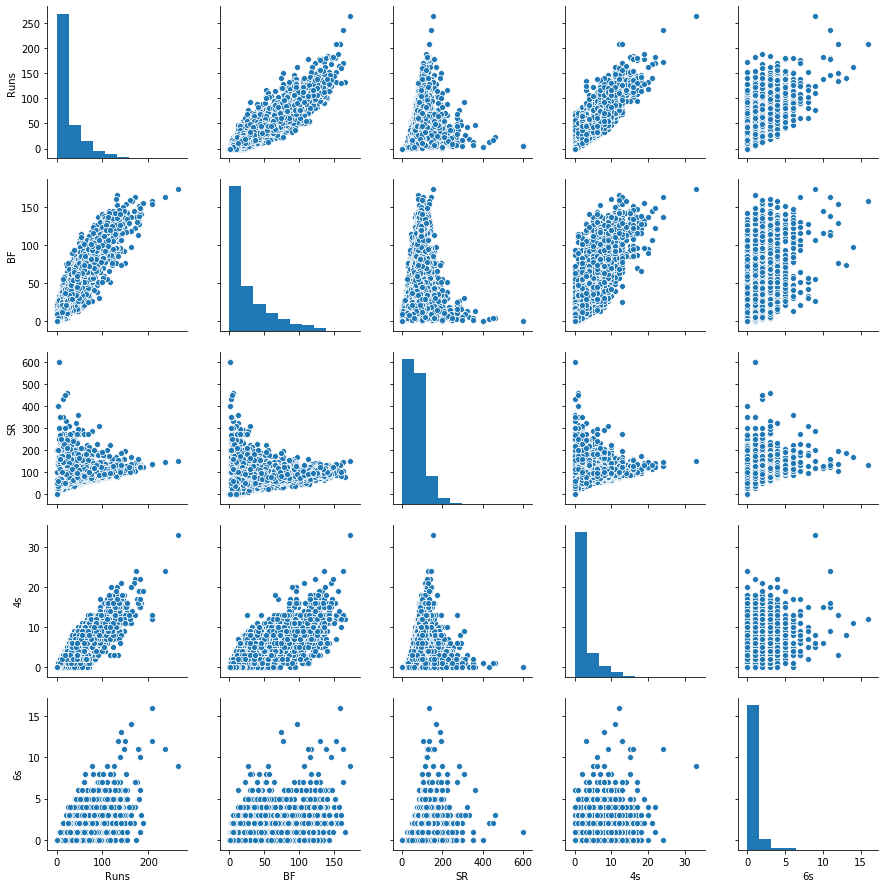

In [25]:
sns.pairplot(df)

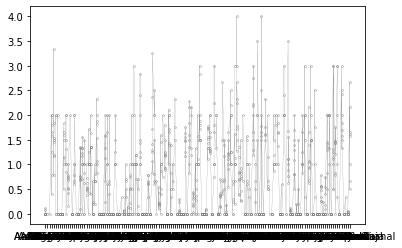

In [26]:
import matplotlib.pyplot as plt
plt.plot(f,b, '-p', color='gray',
         markersize=0.2, linewidth=0.2,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)

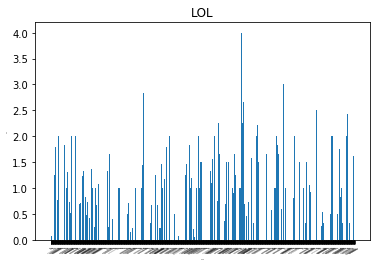

In [27]:
    index = np.arange(len(a))
    plt.bar(index, b)
    plt.xlabel('Players', fontsize=1)
    plt.ylabel('Runs', fontsize=1)
    plt.xticks(index, b, fontsize=1, rotation=30)
    plt.title('LOL')
    plt.show()


In [28]:
g1

[['Aaron Finch ', 'Afghanistan'],
 ['Aaron Finch ', 'Bangladesh'],
 ['Aaron Finch ', 'England'],
 ['Aaron Finch ', 'India'],
 ['Aaron Finch ', 'New Zealand'],
 ['Aaron Finch ', 'Pakistan'],
 ['Aaron Finch ', 'South Africa'],
 ['Aaron Finch ', 'Sri Lanka'],
 ['Aaron Finch ', 'West Indies'],
 ['Abid Ali', 'Australia'],
 ['Abid Ali', 'England'],
 ['Abu Jayed', 'West Indies'],
 ['Adam Zampa', 'Bangladesh'],
 ['Adam Zampa', 'England'],
 ['Adam Zampa', 'India'],
 ['Adam Zampa', 'New Zealand'],
 ['Adam Zampa', 'Pakistan'],
 ['Adam Zampa', 'South Africa'],
 ['Adam Zampa', 'Sri Lanka'],
 ['Adam Zampa', 'West Indies'],
 ['Adil Rashid', 'Australia'],
 ['Adil Rashid', 'Bangladesh'],
 ['Adil Rashid', 'India'],
 ['Adil Rashid', 'New Zealand'],
 ['Adil Rashid', 'Pakistan'],
 ['Adil Rashid', 'South Africa'],
 ['Adil Rashid', 'Sri Lanka'],
 ['Adil Rashid', 'West Indies'],
 ['Aftab Alam', 'Bangladesh'],
 ['Aftab Alam', 'India'],
 ['Aftab Alam', 'Pakistan'],
 ['Aftab Alam', 'Sri Lanka'],
 ['Aiden Markram

In [31]:
#g2
e=[]
e2=[]
for i in range(0,len(g1),1):
     g1[i].append(g2[i])
for i in g1:
    if(i[0]=="Aaron Finch "):
        e.append(i[1])
        e2.append(i[3])
e2

['4.0',
 '19.0',
 '46.12',
 '40.52',
 '13.0',
 '53.888888888888886',
 '35.36842105263158',
 '23.625',
 '18.555555555555557']

In [32]:
df2

,Ground,Mat,Won,Tied,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",4,4,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",4,4,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,15,15,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2,2,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,10,10,0,4863,157,5645,30.97,5.16
...,...,...,...,...,...,...,...,...,...
101,"Greenfield International Stadium, Thiruvananth...",1,1,0,209,11,280,19.00,4.47
102,Sylhet International Cricket Stadium - Bangladesh,1,1,0,400,11,531,36.36,4.51
103,"Rajiv Gandhi International Cricket Stadium, De...",5,4,0,1864,67,2524,27.82,4.43
104,"Wanderers Cricket Ground, Windhoek - Namibia",1,1,0,307,17,474,18.05,3.88


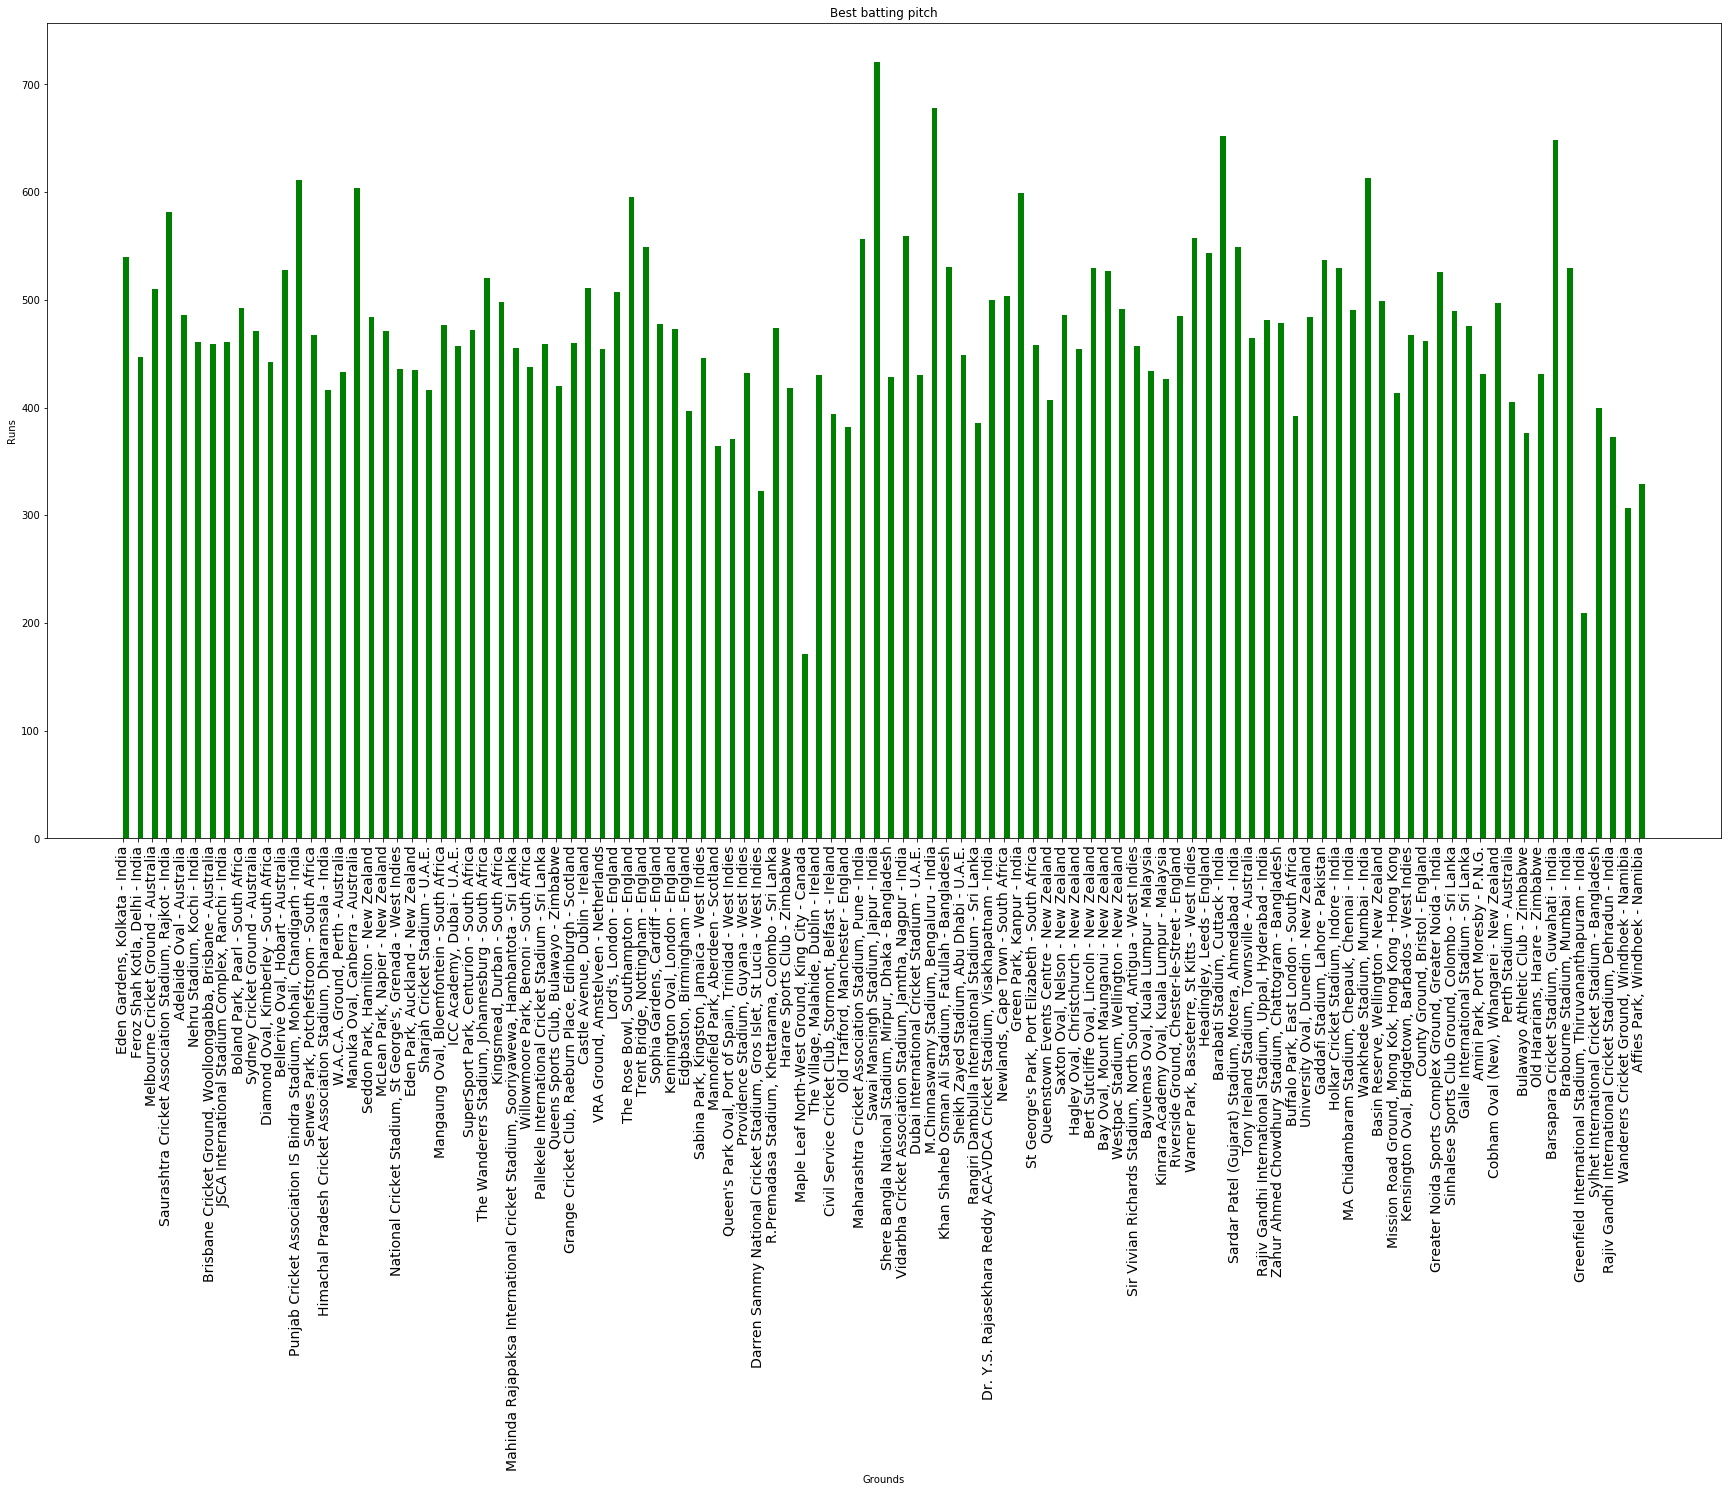

In [46]:
    l=list(df2['Mat'])
    x=list(df2['Runs'])
    ap=[]
    for i in zip(l,x):
        ap.append(float(i[1]/i[0]))
    
    index = np.arange(len(df2['Ground']))
    plt.figure(figsize=(30, 15))
    plt.bar(index,ap,color='green',align='edge',width=0.4)
    plt.xlabel('Grounds', fontsize=10)
    plt.ylabel('Runs', fontsize=10)
    plt.xticks(index, df2['Ground'], fontsize=14,rotation=90)
    plt.title('Best batting pitch')
    plt.show()

In [34]:
df2

,Ground,Mat,Won,Tied,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",4,4,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",4,4,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,15,15,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2,2,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,10,10,0,4863,157,5645,30.97,5.16
...,...,...,...,...,...,...,...,...,...
101,"Greenfield International Stadium, Thiruvananth...",1,1,0,209,11,280,19.00,4.47
102,Sylhet International Cricket Stadium - Bangladesh,1,1,0,400,11,531,36.36,4.51
103,"Rajiv Gandhi International Cricket Stadium, De...",5,4,0,1864,67,2524,27.82,4.43
104,"Wanderers Cricket Ground, Windhoek - Namibia",1,1,0,307,17,474,18.05,3.88


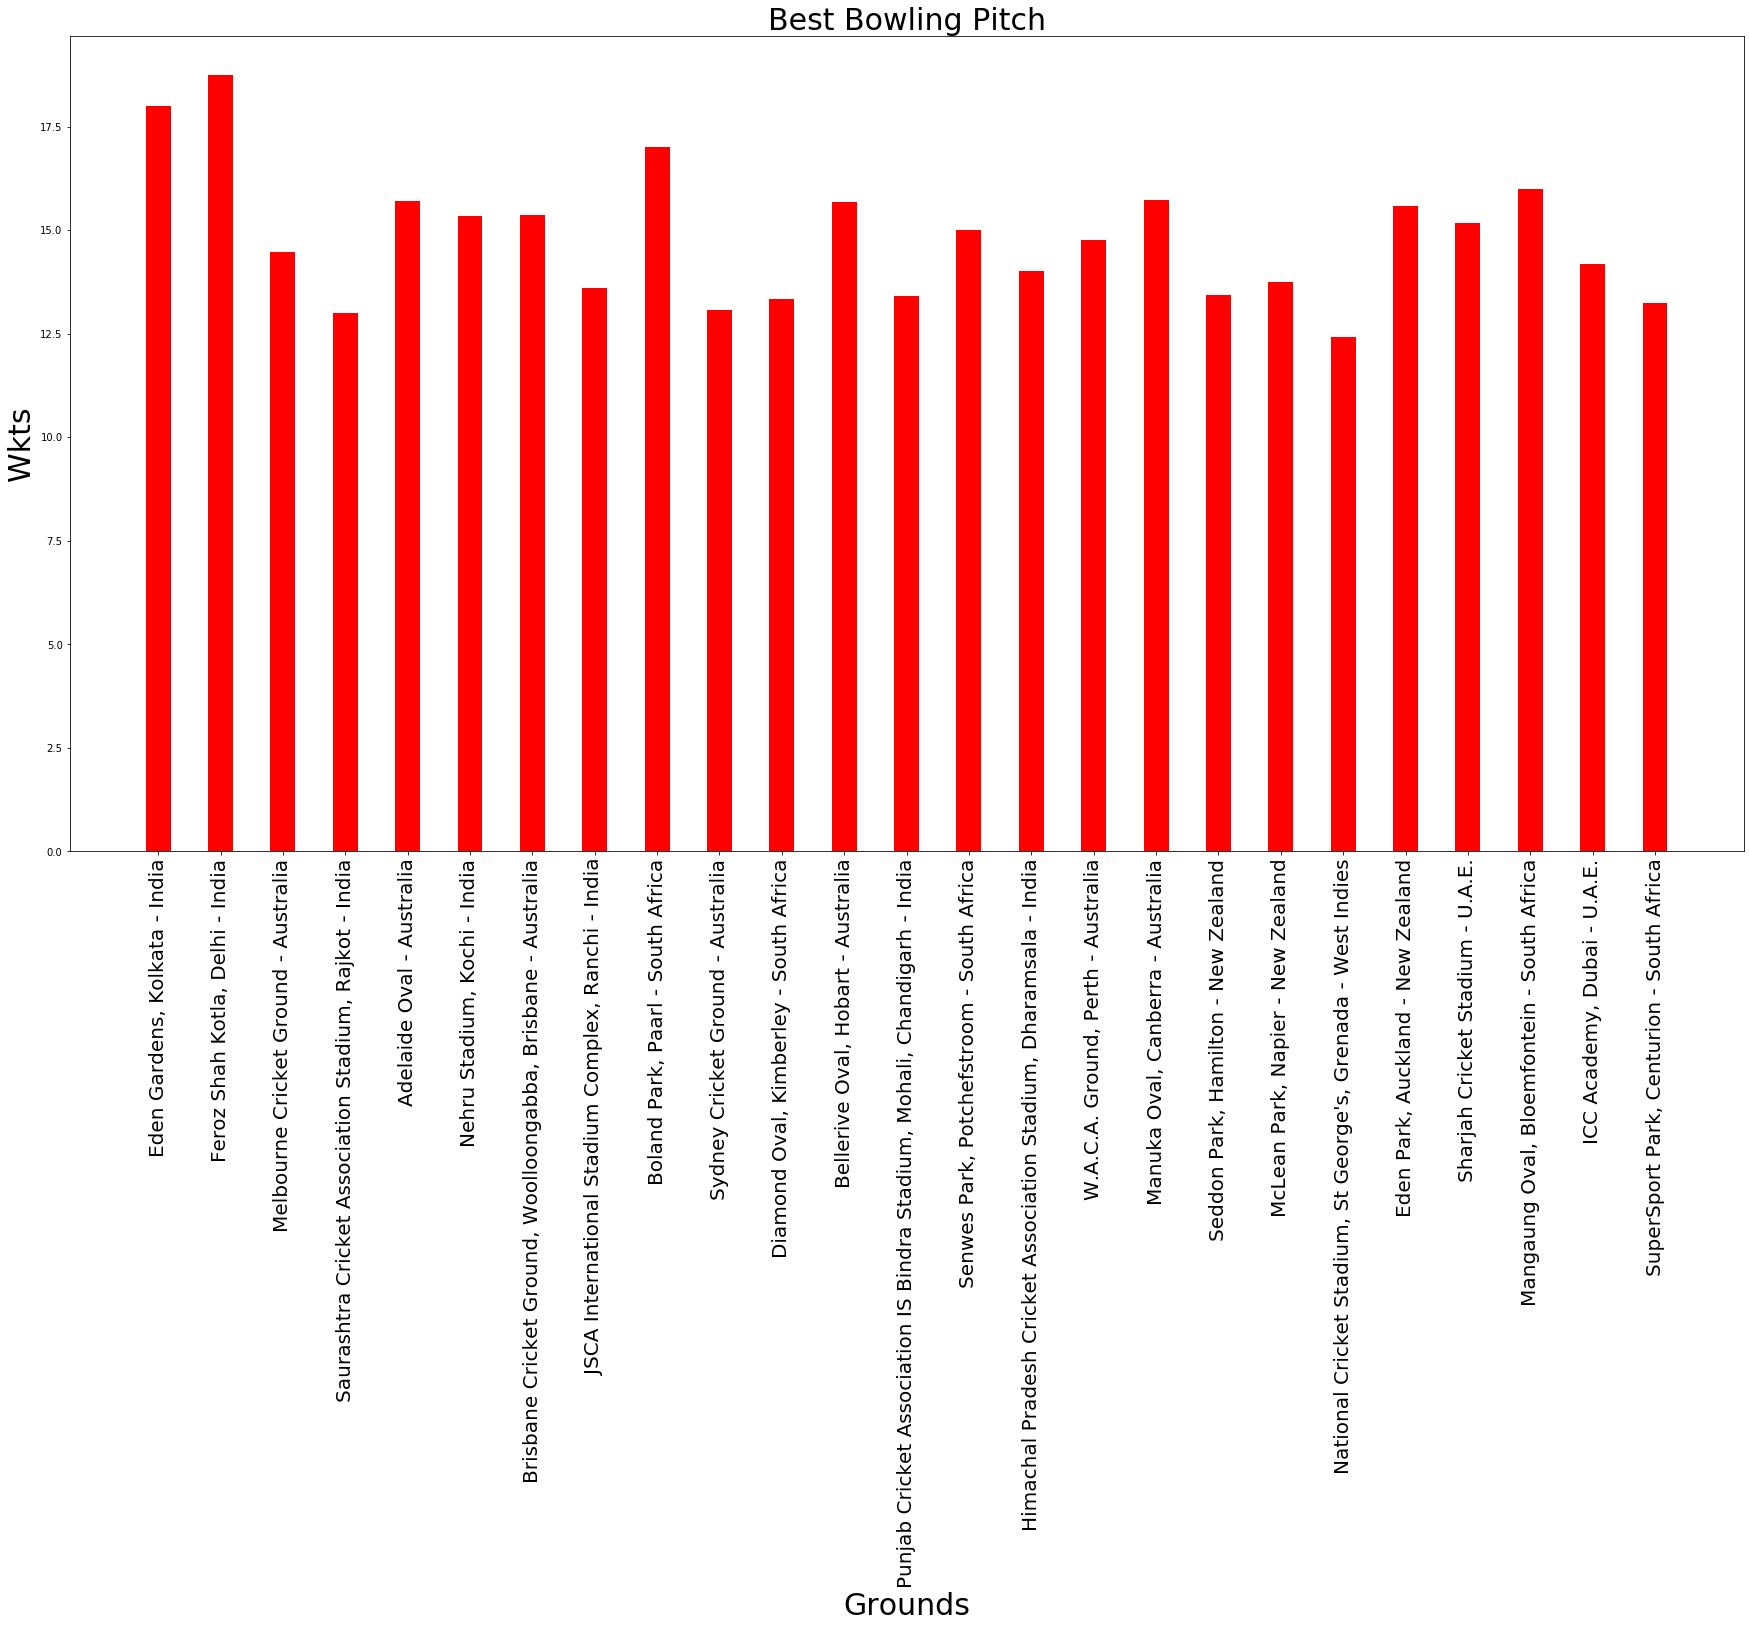

In [51]:
    
    l=list(df2['Mat'])
    x=list(df2['Wkts'])
    ap1=[]
    for i in zip(l,x):
        ap1.append(float(i[1]/i[0]))
    
    index = np.arange(len(df2['Ground'][0:25]))
    plt.figure(figsize=(30, 15))
    plt.bar(index,ap[0:25],color='red',align='center', width=0.4)
    plt.xlabel('Grounds', fontsize=30)
    plt.ylabel('Wkts', fontsize=30)
    plt.xticks(index, df2['Ground'][0:25], fontsize=20,rotation=90)
    plt.title('Best Bowling Pitch',fontsize=30)
    plt.show()

In [1102]:
#gbat.dropna()
#gbowl.dropna()

e3=[float(i) for i in e2]
e3

[4.0,
 19.0,
 46.12,
 40.52,
 13.0,
 53.888888888888886,
 35.36842105263158,
 23.625,
 18.555555555555557]

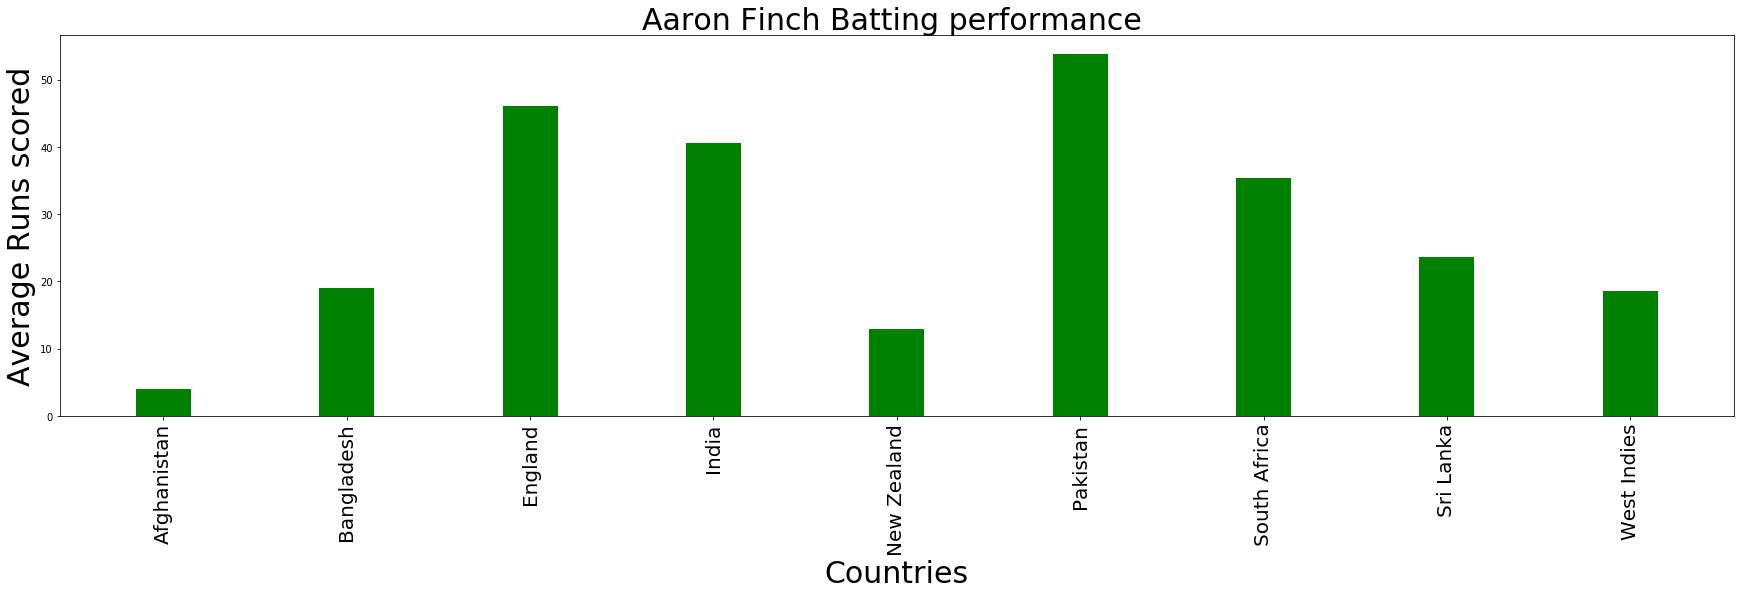

In [1103]:
    index = np.arange(len(e))
    plt.figure(figsize=(30, 7))
    plt.bar(e, e3,align='center', color='green',width=0.3)
    plt.xlabel('Countries', fontsize=30)
    plt.ylabel('Average Runs scored', fontsize=30)
    plt.xticks(index,e, fontsize=20,rotation=90)
    plt.title('Aaron Finch Batting performance ',fontsize=30)
    plt.show()

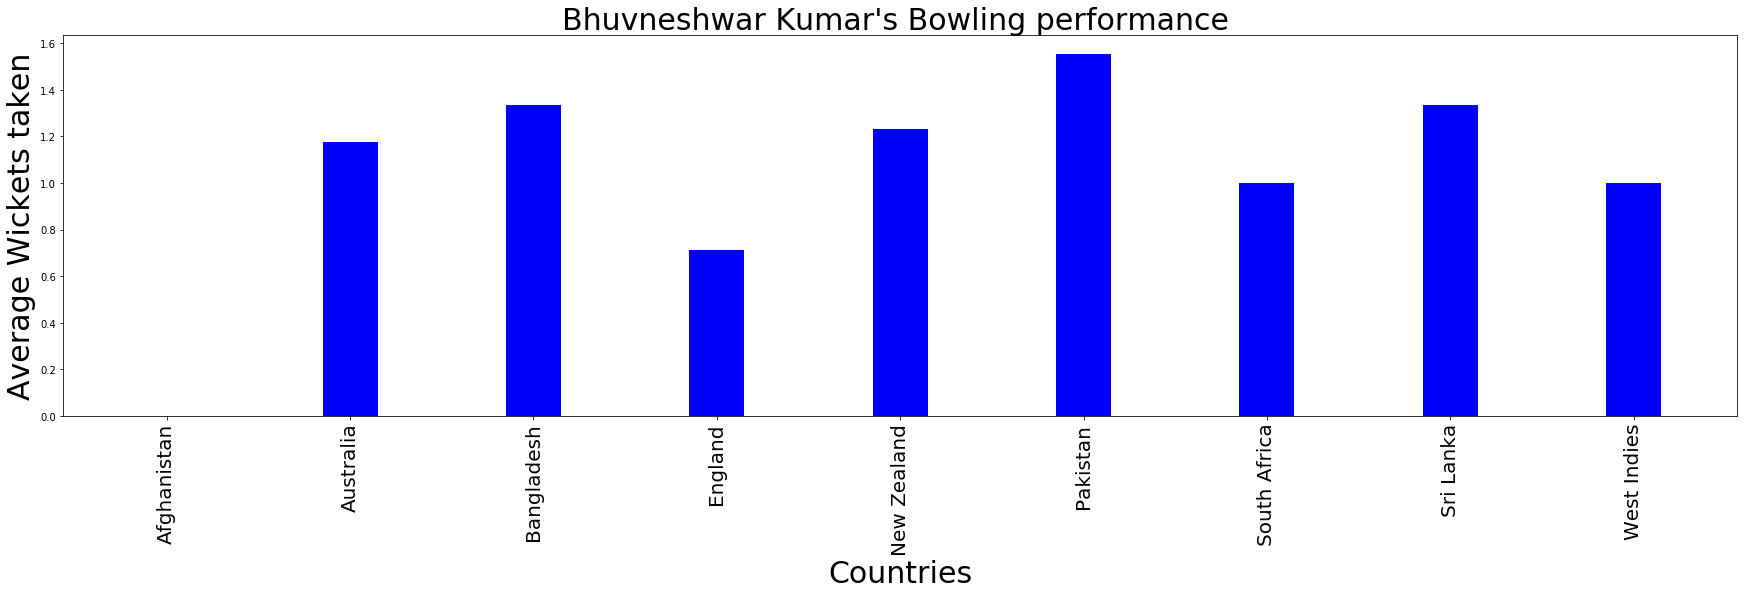

In [1104]:
e12=[]
e21=[]
k1=df1.groupby(['Bowler','Opposition'])
k2=[]
k3=[]
for i,j in k1:
    k2.append(list(i))
    k3.append(str(j.Wkts.mean()))

for i in range(0,len(k2),1):
     k2[i].append(k3[i])
for i in k2:
    if(i[0]=='Bhuvneshwar Kumar'):
        e12.append(i[1])
        e21.append(float(i[2]))
index = np.arange(len(e12))
plt.figure(figsize=(30, 7))
plt.bar(index, e21,align='center', color='blue',width=0.3)
plt.xlabel('Countries', fontsize=30)
plt.ylabel('Average Wickets taken', fontsize=30)
plt.xticks(index,e12, fontsize=20,rotation=90)
plt.title('Bhuvneshwar Kumar\'s Bowling performance ',fontsize=30)
plt.show()



In [1139]:
g3=df1.groupby(['Bowler','Opposition'])
g4=[]
g5=[]
g6=[]
g7=[]
for i,j in g3:
    g4.append(list(i))
    g5.append(str(j.Wkts.mean()))
    g6.append(str(j.Econ.mean()))
    g7.append(str(j.Ave.mean()))

wk=[]
econ=[]
ave=[]
c=[]
for i in range(0,len(g4),1):
        g4[i].append(g5[i])
        g4[i].append(g6[i])
        g4[i].append(g7[i])
for i in g4:
    if(i[0]=='Adam Zampa'):
        
        wk.append(float(i[2]))
        econ.append(float(i[3]))
        ave.append(float(i[4]))
        c.append(i[1])
g10=[]
for i in g4:
    if(i[0]=='Adam Zampa'):
        g10.append([i[1],i[2],i[3],i[4]])
g10

[['Bangladesh', '2.0', '3.25', '6.5'],
 ['England', '0.4', '6.029999999999999', '20.2'],
 ['India', '1.6666666666666667', '5.863333333333333', '34.406666666666666'],
 ['New Zealand', '1.25', '5.6625', '26.625'],
 ['Pakistan', '1.5714285714285714', '5.6085714285714285', '37.72571428571428'],
 ['South Africa',
  '0.7777777777777778',
  '6.225555555555555',
  '21.59222222222222'],
 ['Sri Lanka', '1.8', '4.752000000000001', '15.632'],
 ['West Indies', '2.0', '5.489999999999999', '28.44333333333333']]

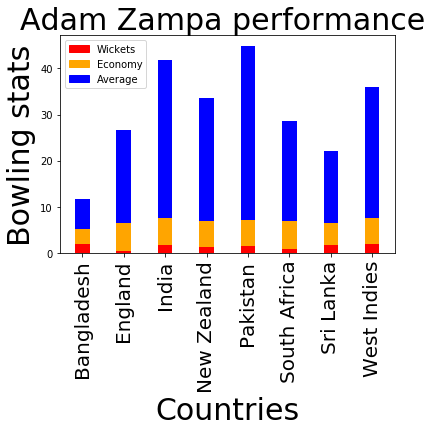

In [1150]:
index=np.arange(len(g10))
bars = np.add(wk, econ).tolist()
plt.bar(x=index,height=wk,color='red',width=0.35)
plt.bar(x=index,height=econ,color='orange',width=0.35,bottom=wk)
plt.bar(x=index,height=ave,color='blue',bottom=bars,width=0.35)

plt.xlabel('Countries', fontsize=30)
plt.ylabel('Bowling stats', fontsize=30)
plt.xticks(index,c, fontsize=20,rotation=90)
plt.title('Adam Zampa performance ',fontsize=30)

import matplotlib.patches as mpa
red=mpa.Patch(color='red',label='Wickets')
orange=mpa.Patch(color='orange',label='Economy')
blue=mpa.Patch(color='blue',label='Average')
plt.legend(handles=[red,orange,blue],loc='upper left')
plt.show()


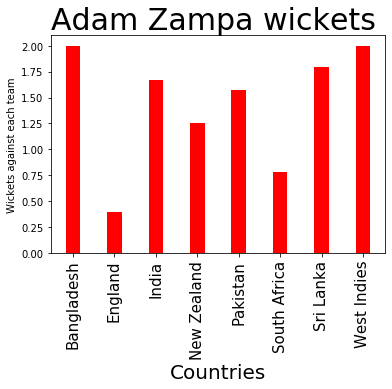

In [1107]:
plt.bar(x=index,height=wk,color='red',width=0.35)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('Wickets against each team', fontsize=10)
plt.xticks(index,c, fontsize=15,rotation=90)
plt.title('Adam Zampa wickets ',fontsize=30)
plt.show()

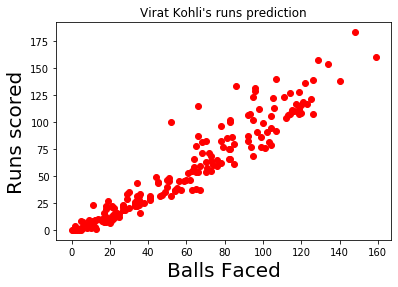

In [1108]:
#Regression Problem 
q=df.groupby(['Batsman','Runs','BF'])
runsscored=[]
ballsfaced=[]
player=[]

for i,j in q:
    player.append(list(i))
for i in player:
    if(i[0]=='Virat Kohli '):
        runsscored.append(float(i[1]))
        ballsfaced.append(float(i[2]))
len(runsscored)==len(ballsfaced)

plt.scatter(ballsfaced,runsscored,color='red')
plt.xlabel("Balls Faced",fontsize=20)
plt.ylabel("Runs scored",fontsize=20)
plt.title("Virat Kohli's runs prediction")
plt.show()


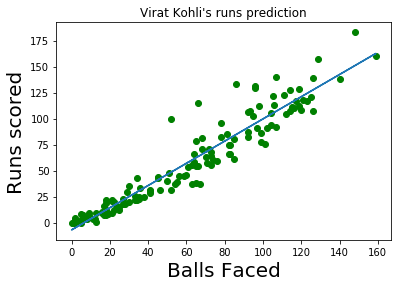

In [1109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
bf2=[[x] for x in ballsfaced]
X_train,X_test,Y_train,Y_test=train_test_split(bf2,runsscored,test_size=0.3,random_state=3)
reg=LinearRegression()
reg.fit(X_train,Y_train)
y_predict=reg.predict(X_test)

plt.scatter(X_train,Y_train,color='green')
plt.plot(X_train,reg.predict(X_train))
plt.xlabel("Balls Faced",fontsize=20)
plt.ylabel("Runs scored",fontsize=20)
plt.title("Virat Kohli's runs prediction")
plt.show()

In [1160]:
reg.predict([[25.0],[140.0]])
z=reg.score(X_test,Y_test)


0.9162840262181082

In [1111]:
#Hypothesis1 
#Indian fast bowler : Bhuvneshwar Kumar 
#Indian slow bowler : Yuzvendra Chahal
abc=df1.groupby(['Bowler','Opposition'])
bowler=[]
econstr=[]
fastbowlers=[]
slowbowlers=[]

econvalbhuv=[]
econvalchahal=[]
for i,j in abc:
    bowler.append((list(i)))
    econstr.append(str(j.Econ.mean()))
for i in range(0,len(bowler),1):
    if(bowler[i][0]=='Bhuvneshwar Kumar'):
        econvalbhuv.append(float(econstr[i]))
    if(bowler[i][0]=='Yuzvendra Chahal'):
        econvalchahal.append(float(econstr[i]))

fastbowlers.append(econvalbhuv)
slowbowlers.append(econvalchahal)

#England fast bowler : Ben Stokes
#England slow bowler : Adil Rashid
econvalben=[]
econvalrash=[]
for i in range(0,len(bowler),1):
    if(bowler[i][0]=='Ben Stokes'):
        econvalben.append(float(econstr[i]))
    elif(bowler[i][0]=='Adil Rashid'):
        econvalrash.append(float(econstr[i]))
fastbowlers.append(econvalben)
slowbowlers.append(econvalrash)

#Australian fast bowler : Mitchell Starc
#Australian slow bowler : Adam Zampa
econvalsta=[]
econvalz=[]
for i in range(0,len(bowler),1):
    if(bowler[i][0]=='Mitchell Starc'):
        econvalsta.append(float(econstr[i]))
    elif(bowler[i][0]=='Adam Zampa'):
        econvalz.append(float(econstr[i]))
fastbowlers.append(econvalsta)
slowbowlers.append(econvalz)


In [1112]:
from scipy.stats import ttest_ind
ttest_ind(fastbowlers[0][0:9],slowbowlers[0][0:9],equal_var=True)

Ttest_indResult(statistic=-0.454193450435246, pvalue=0.6561925591340334)

In [1113]:
ttest_ind(fastbowlers[1],slowbowlers[1],equal_var=True)

Ttest_indResult(statistic=-0.13062947381583073, pvalue=0.897926908790694)

In [1114]:
ttest_ind(fastbowlers[2][0:9],slowbowlers[2][0:9],equal_var=True)


Ttest_indResult(statistic=-1.6427836074902311, pvalue=0.12122012739568677)

In [1163]:
s1=[]
for i in fastbowlers:
    s1=i+i

s1=fastbowlers[0]+fastbowlers[1]+fastbowlers[2]
s2=slowbowlers[0]+slowbowlers[1]+slowbowlers[2]
ttest_ind(s1,s2,equal_var=True)
print(s2)

[5.625, 3.935, 4.499999999999999, 5.74125, 4.98, 5.501666666666666, 4.2, 5.333333333333333, 5.819999999999999, 5.013333333333333, 6.225, 5.651818181818182, 5.751666666666666, 5.727777777777778, 4.6930000000000005, 4.2907692307692304, 3.25, 6.029999999999999, 5.863333333333333, 5.6625, 5.6085714285714285, 6.225555555555555, 4.752000000000001, 5.489999999999999]


In [1116]:
import statistics as st

d={
     'FastBowlers':pd.Series(s1[0:24]),
     'SlowBowlers':pd.Series(s2)
}
dd=pd.DataFrame(d)
dd.describe()


,FastBowlers,SlowBowlers
count,24.000000,24.000000
mean,4.959422,5.244649
std,0.897261,0.770731
min,3.120000,3.250000
25%,4.195278,4.737250
50%,5.032500,5.555119
75%,5.574353,5.743854
max,6.537500,6.225556


In [1117]:
from scipy.stats import variation
p1= variation(s1[0:24])
p2=variation(s2)
p1,p2

(0.17711126698213692, 0.14386150306639342)

In [1118]:
from scipy.stats import skew
p1= skew(s1)
p2=skew(s2)
p1,p2

(-0.034135060309169254, -0.9198336271027852)

In [1119]:
fp=pd.read_csv("Batno.csv")

In [1120]:
fp.drop(fp.columns[0],axis=1)


,Runs,BF,SR,4s,6s
0,-0.530510,-0.337359,-0.344079,-1.020189,-0.605258
1,-0.844923,-0.656925,-1.012365,-1.020189,-0.605258
2,-0.687717,-0.878163,2.057192,-0.738295,-0.605258
3,-0.661515,-0.484851,-0.500626,-0.456400,-0.605258
4,0.045914,-0.017793,0.435150,0.389283,-0.605258
...,...,...,...,...,...
9359,-0.260851,-0.280187,-0.324964,-0.230961,NaN
9360,-0.260851,-0.280187,-0.324964,-0.230961,NaN
9361,4.848764,5.444819,1.936215,4.896366,NaN
9362,-0.260851,-0.125457,-0.324964,-0.230961,NaN


In [1121]:
k1=df.groupby(['Batsman','Opposition'])
k2=[]
k3=[]
k4=[]
k5=[]
k6=[]
for i,j in k1:
    k2.append(list(i))
    k3.append(str(j.Runs.mean()))
    k4.append(str(j.SR.mean()))
    #k5.append(str(j.k1["4s"].mean()))
    #k6.append(str(j.k1["6s"].mean()))

bat=fp['Runs']
sr=fp['BF']
runs1=[]
bfs=[]
for i in range(0,len(k2),1):
    k2[i].append(float(bat[i]))
    k2[i].append(float(sr[i]))
for i in k2:
    if(i[0]=='David Warner'):
        runs1.append(float(i[2]))
        bfs.append(float(i[3]))


In [1122]:
runs1

[-0.5100495338350031,
 -0.5100495338350031,
 -0.5100495338350031,
 -0.5100495338350031,
 0.2581475191654709,
 -0.5100495338350031,
 -0.5100495338350031,
 -0.5100495338350031,
 0.5142132034989623]

In [1123]:
bfs


[-0.525542274904567,
 -0.525542274904567,
 -0.525542274904567,
 -0.525542274904567,
 -0.2584278128662953,
 -0.525542274904567,
 -0.525542274904567,
 -0.4365041208918097,
 0.4538774192357624]

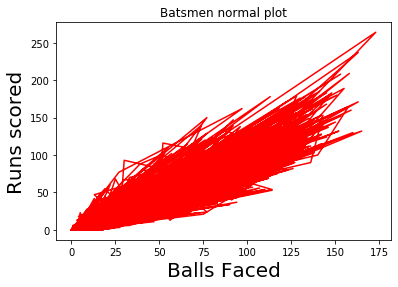

In [1124]:

plt.plot(df['BF'],df['Runs'],color='red')
plt.xlabel("Balls Faced",fontsize=20)
plt.ylabel("Runs scored",fontsize=20)
plt.title("Batsmen normal plot")
plt.show()

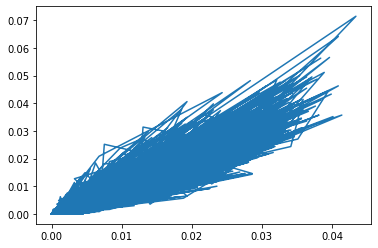

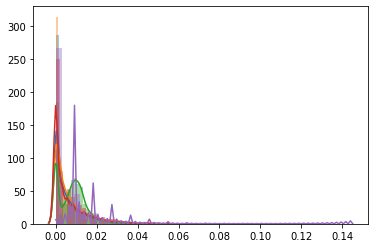

In [1125]:
from sklearn import preprocessing
scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform([df['Runs']])
scale=scaler.fit_transform([df['BF']])

s1=scaler.fit_transform([df['SR']])
s2=scaler.fit_transform([df['4s']])
s3=scaler.fit_transform([df['6s']])
plt.plot(scale[0],scaled_df[0])
plt.show()
a=sns.distplot(scaled_df[0])
b=sns.distplot(scale[0])
c=sns.distplot(s1[0])
d=sns.distplot(s2[0])
e=sns.distplot(s3[0])

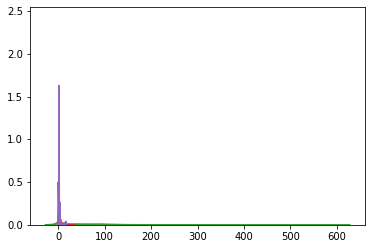

In [1126]:
a1=sns.distplot([df['Runs']])
b1=sns.distplot([df['BF']])
c1=sns.distplot([df['SR']])
d1=sns.distplot([df['4s']])
e1=sns.distplot([df['6s']])

In [1127]:
import statistics as st
meanofruns=st.mean(scaled_df[0])

In [1128]:
meanofruns

0.006195284429965756

In [1129]:
st.variance(scaled_df[0])

6.841772653948507e-05

In [1130]:
a=df['Runs'].transform(lambda x: (x - x.mean())/x.std())
b=df['BF'].transform(lambda x: (x - x.mean())/x.std())
c=df['SR'].transform(lambda x: (x - x.mean())/x.std())
d=df['4s'].transform(lambda x: (x - x.mean())/x.std())
e=df['6s'].transform(lambda x: (x - x.mean())/x.std())

In [1131]:
a

0       -0.225787
1       -0.618190
2       -0.421989
3       -0.389288
4        0.493619
           ...   
11144   -0.748992
11145   -0.748992
11146   -0.160386
11147   -0.748992
11148   -0.748992
Name: Runs, Length: 9364, dtype: float64

In [1132]:
a.mean()

1.2837991147630493e-16

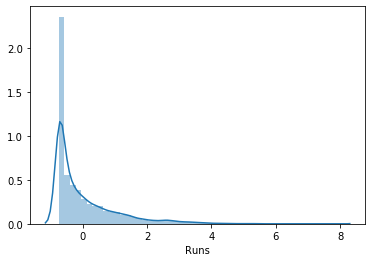

In [1133]:
sns.distplot(a)


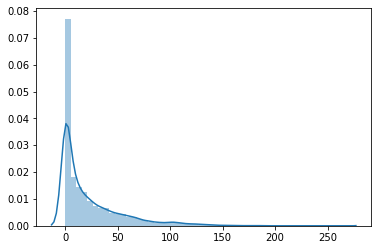

In [1134]:
sns.distplot([df['Runs']])

(0       -0.225787
 1       -0.618190
 2       -0.421989
 3       -0.389288
 4        0.493619
            ...   
 11144   -0.748992
 11145   -0.748992
 11146   -0.160386
 11147   -0.748992
 11148   -0.748992
 Name: Runs, Length: 9364, dtype: float64, 0        0.048192
 1       -0.364042
 2       -0.649435
 3       -0.142070
 4        0.460426
            ...   
 11144   -0.839697
 11145   -0.839697
 11146    0.333585
 11147   -0.807986
 11148   -0.807986
 Name: BF, Length: 9364, dtype: float64)

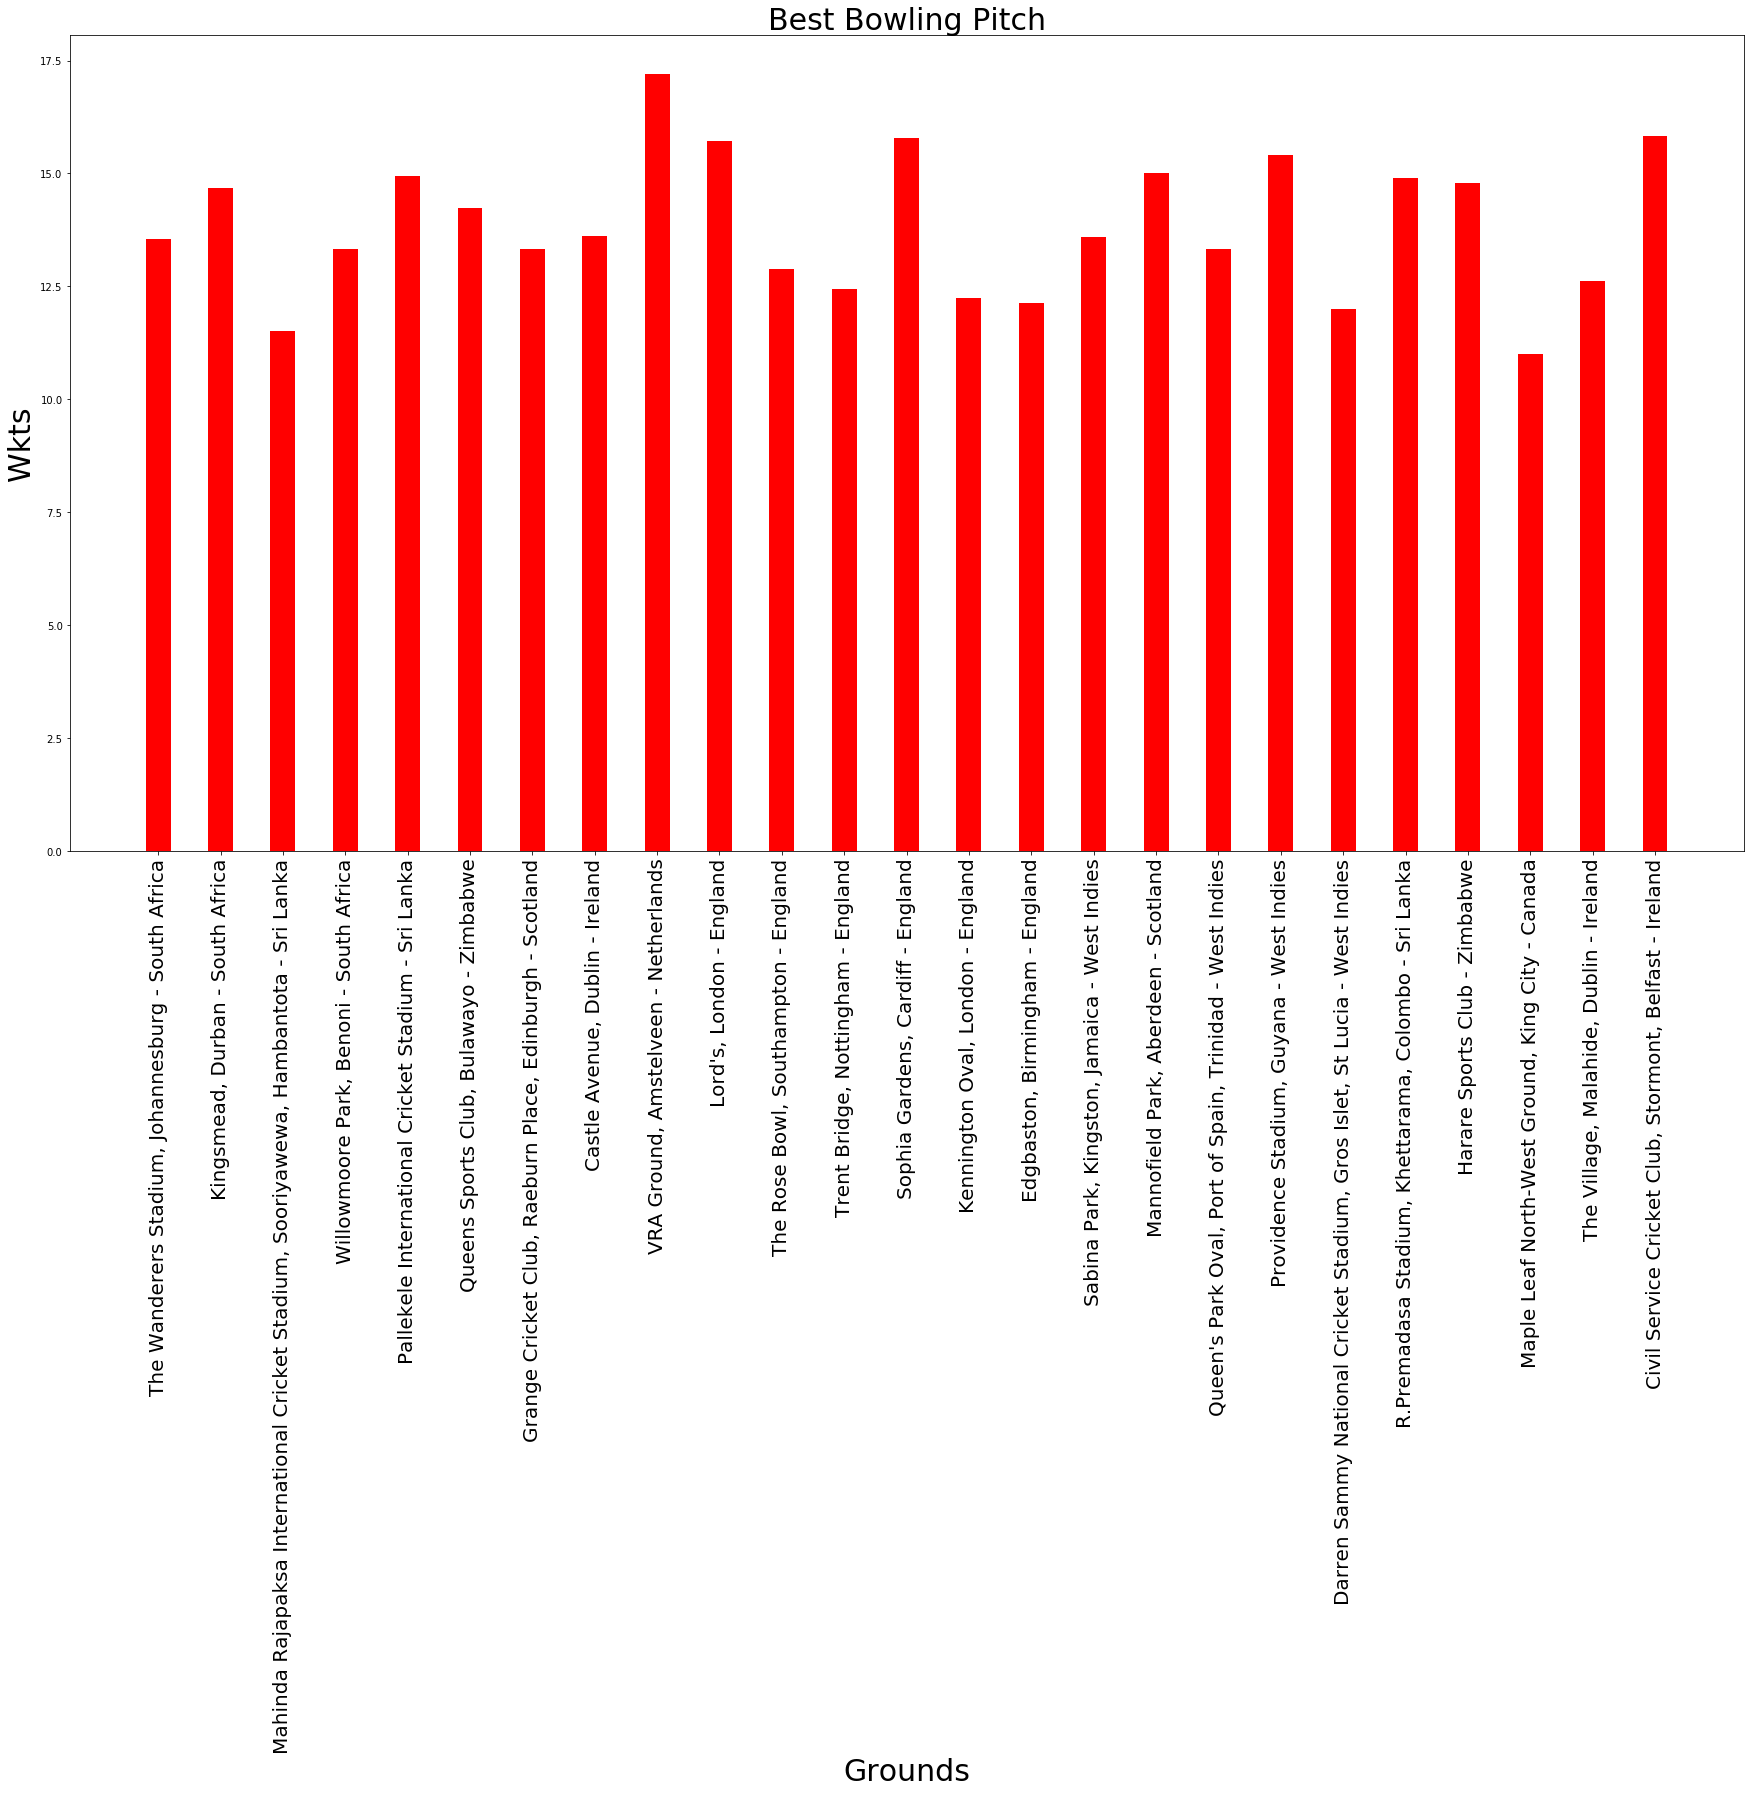

In [52]:
    index = np.arange(len(df2['Ground'][25:50]))
    plt.figure(figsize=(30, 15))
    plt.bar(index, ap1[25:50],color='red',align='center', width=0.4)
    plt.xlabel('Grounds', fontsize=30)
    plt.ylabel('Wkts', fontsize=30)
    plt.xticks(index, df2['Ground'][25:50], fontsize=20,rotation=90)
    plt.title('Best Bowling Pitch',fontsize=30)
    plt.show()

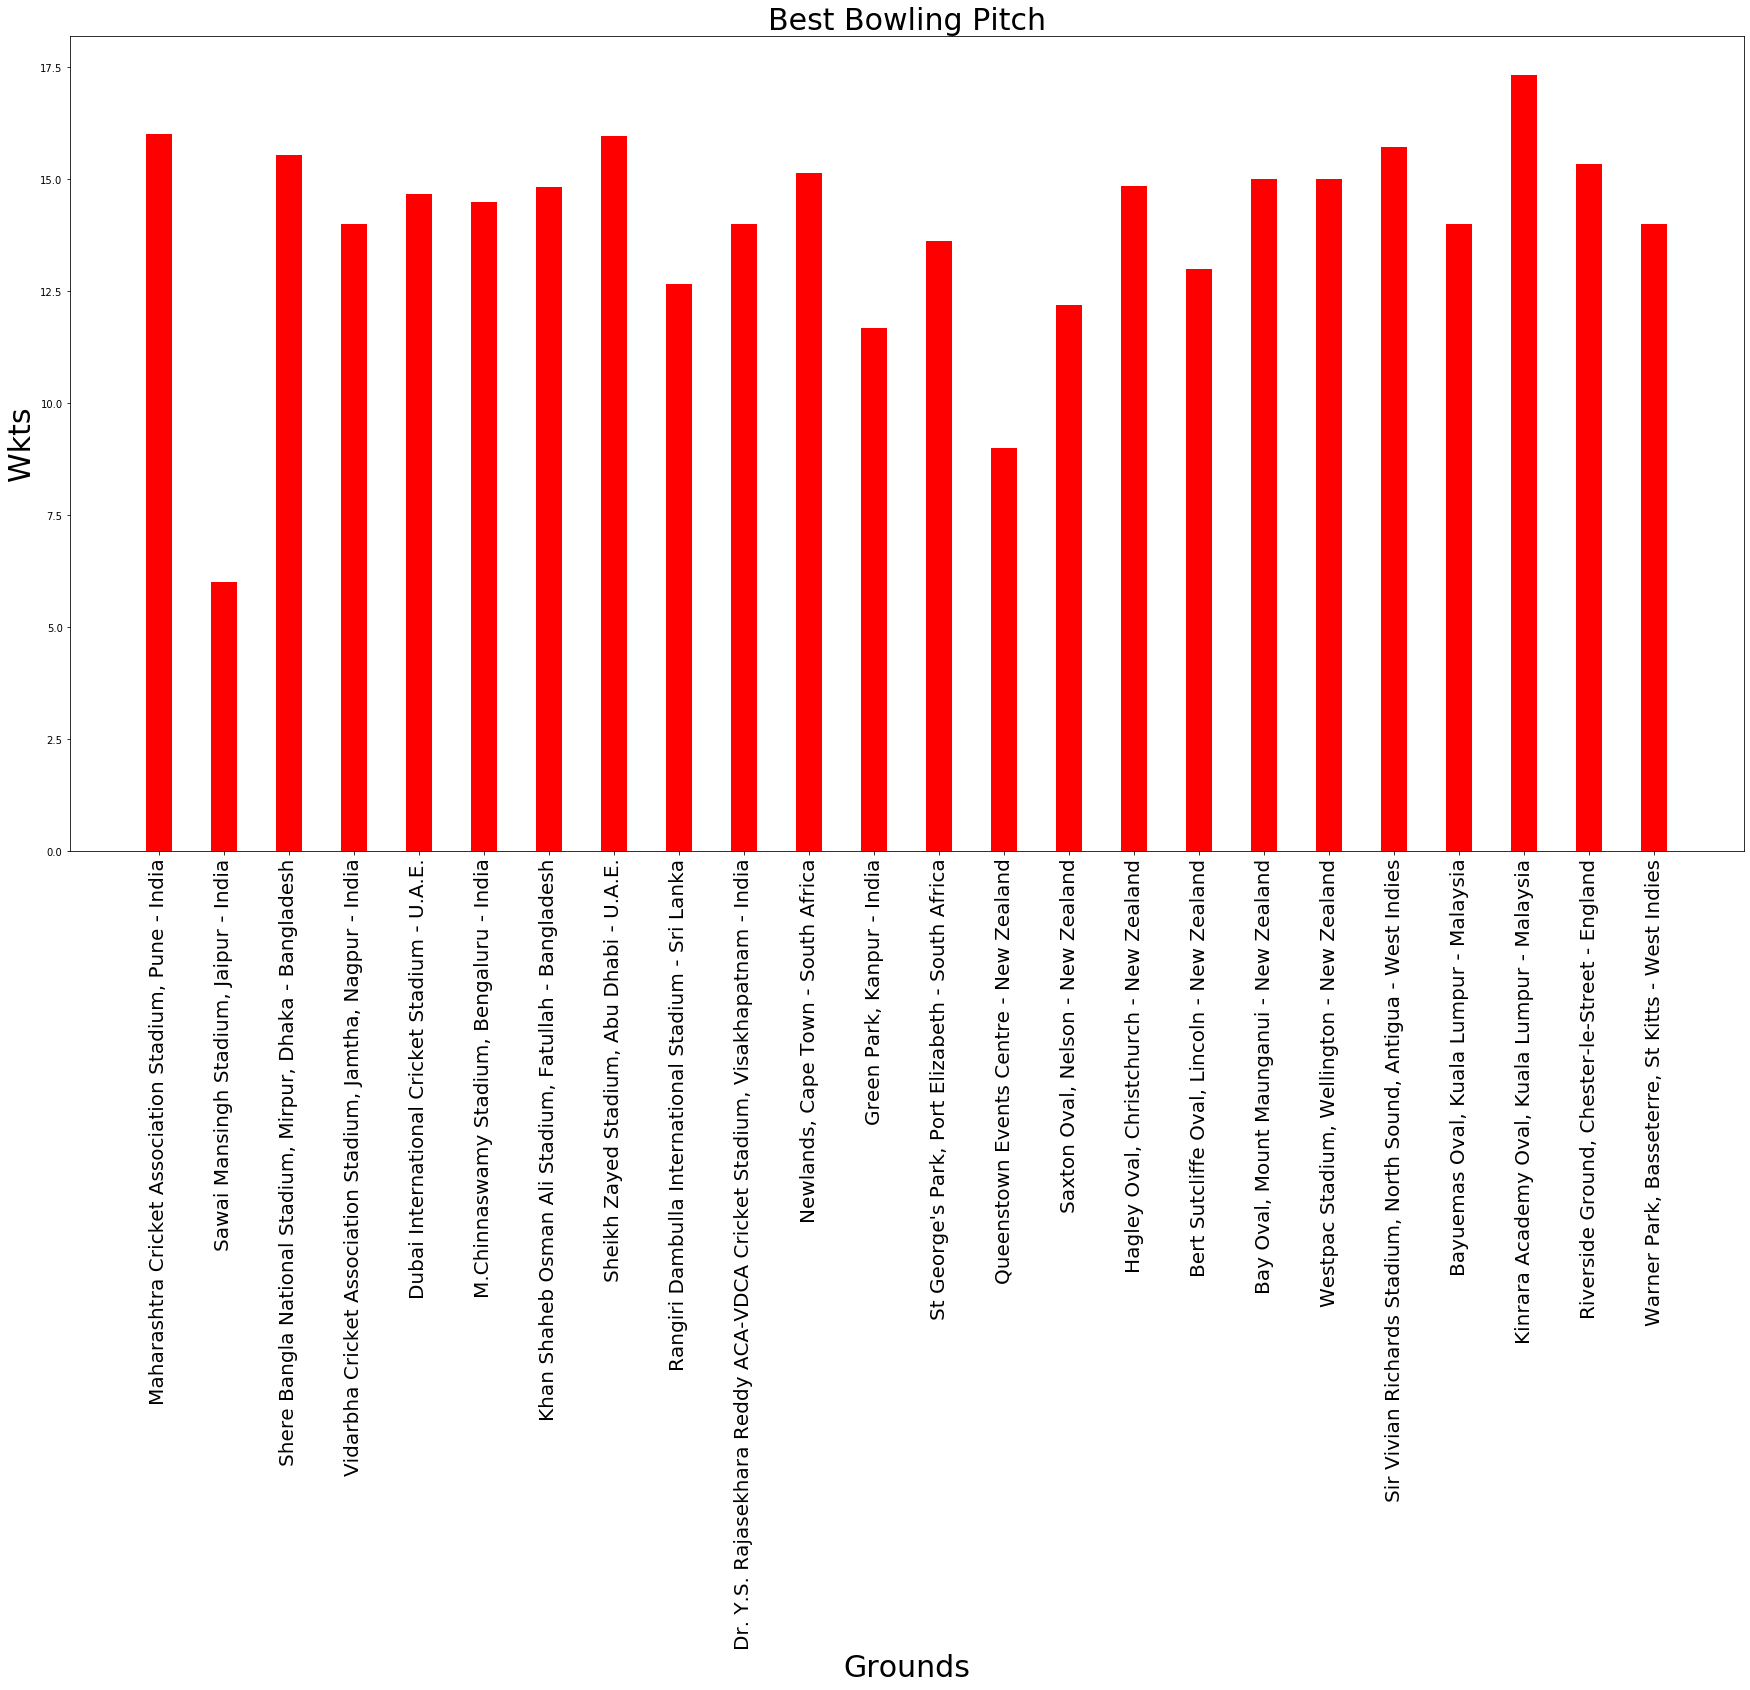

In [53]:
    index = np.arange(len(df2['Ground'][51:75]))
    plt.figure(figsize=(30, 15))
    plt.bar(index, ap1[51:75],color='red',align='center', width=0.4)
    plt.xlabel('Grounds', fontsize=30)
    plt.ylabel('Wkts', fontsize=30)
    plt.xticks(index, df2['Ground'][51:75], fontsize=20,rotation=90)
    plt.title('Best Bowling Pitch',fontsize=30)
    plt.show()

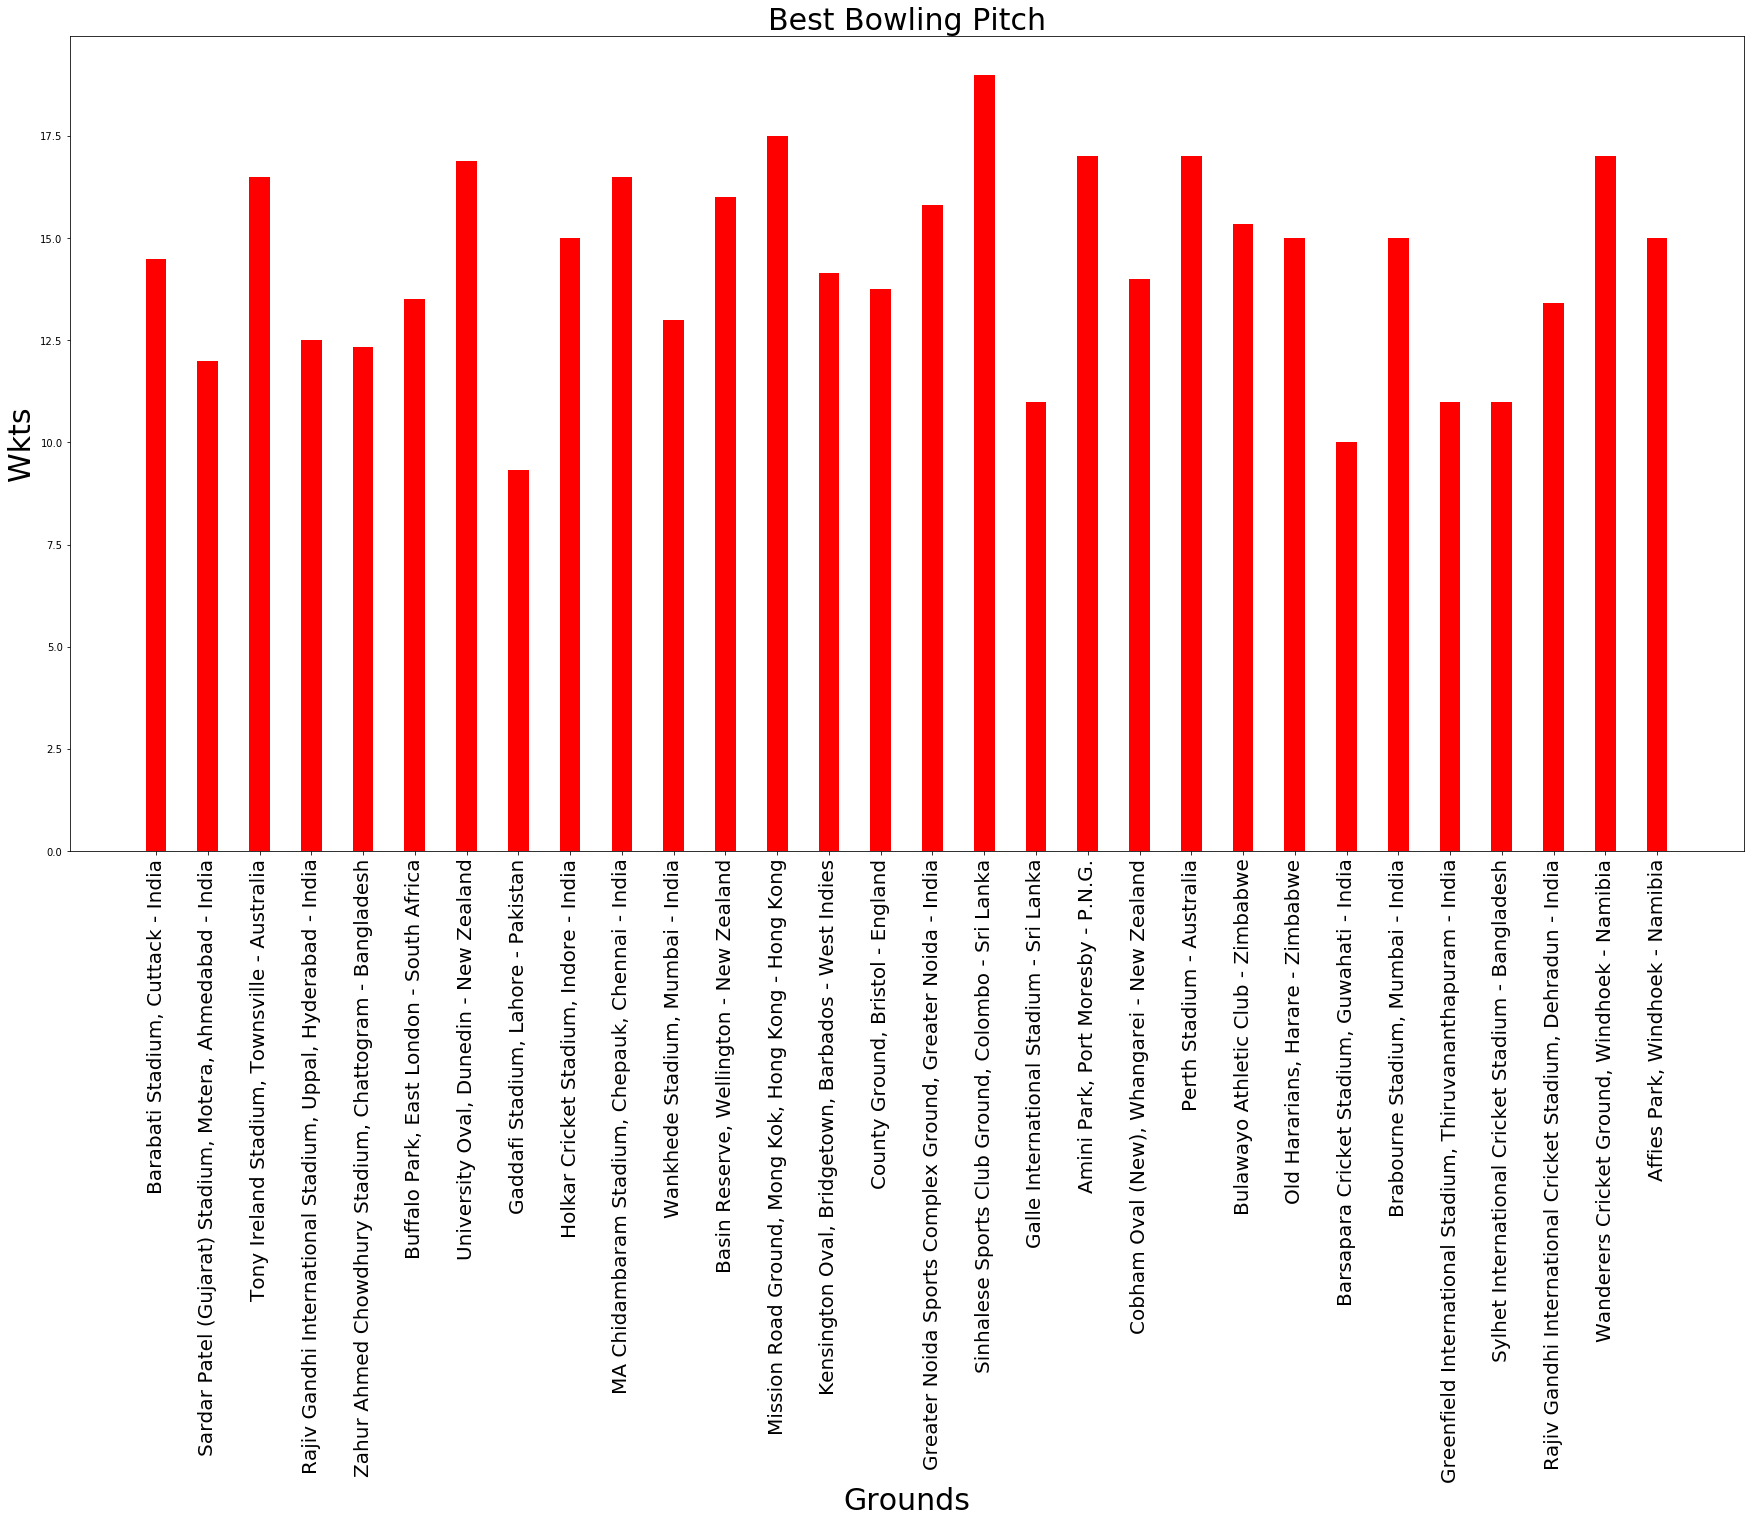

In [54]:
    index = np.arange(len(df2['Ground'][76:107]))
    plt.figure(figsize=(30, 15))
    plt.bar(index, ap1[76:107],color='red',align='center', width=0.4)
    plt.xlabel('Grounds', fontsize=30)
    plt.ylabel('Wkts', fontsize=30)
    plt.xticks(index, df2['Ground'][76:107], fontsize=20,rotation=90)
    plt.title('Best Bowling Pitch',fontsize=30)
    plt.show()